In [290]:
import pandas as pd
import numpy as np

train_data = pd.read_csv("C:\\Users\\vitor\\Documents\\PythonTraining\\Kaggle\\titanic\\train.csv")
train_data.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [291]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [292]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


0.3838383838383838
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


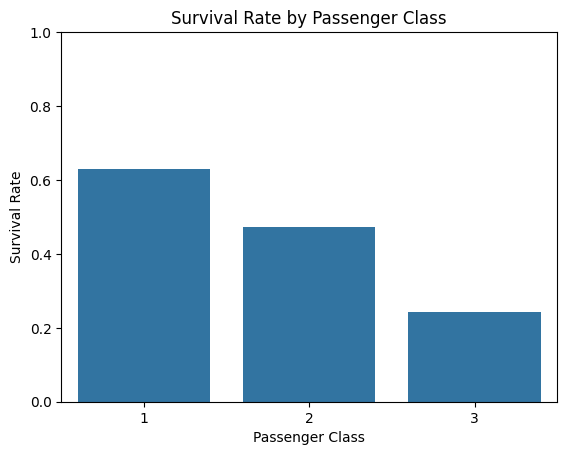

In [293]:
import seaborn as sns
import matplotlib.pyplot as plt

survival_rate = np.mean(train_data["Survived"].to_list())
print(survival_rate) # 38% of people in the training dataset survived

sns.barplot(
    data=train_data,
    x="Pclass",
    y="Survived",
    errorbar=None
)

survival_rate_class = train_data.groupby("Pclass")["Survived"].mean()
print(survival_rate_class) 


plt.ylabel("Survival Rate")
plt.xlabel("Passenger Class")
plt.title("Survival Rate by Passenger Class")
plt.ylim(0, 1)
plt.show()

Sex
male      64.758698
female    35.241302
Name: proportion, dtype: float64


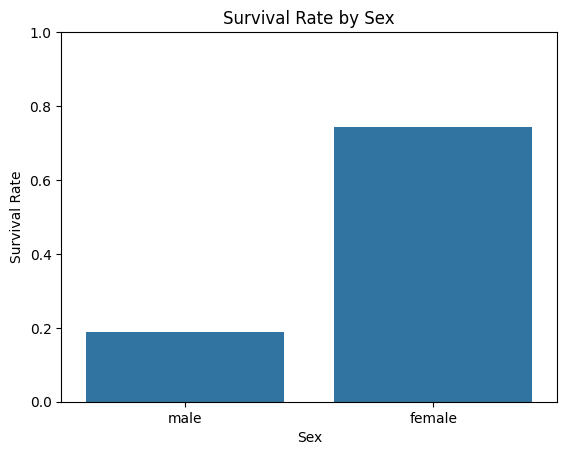

In [294]:
# Plot the survival rate based on sex
sns.barplot(
    data=train_data,
    x="Sex",
    y="Survived",
    errorbar=None
)

pct_sex = train_data["Sex"].value_counts(normalize=True) * 100
print(pct_sex)

plt.ylabel("Survival Rate")
plt.xlabel("Sex")
plt.title("Survival Rate by Sex")
plt.ylim(0, 1)
plt.show()

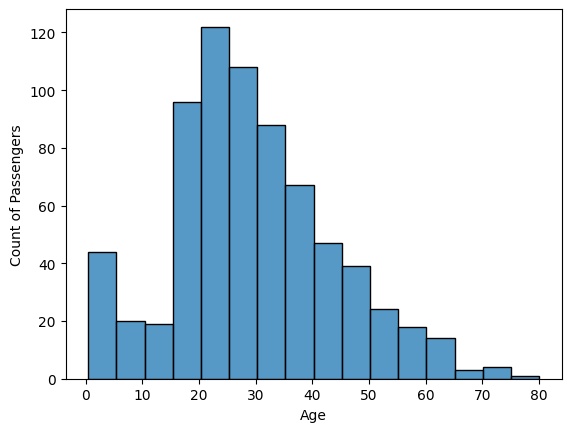

In [295]:
# Display passengers' age distribution 
sns.histplot(data=train_data, x="Age", binwidth=5) # age distribution is skewed to the right

plt.ylabel("Count of Passengers")
plt.show()


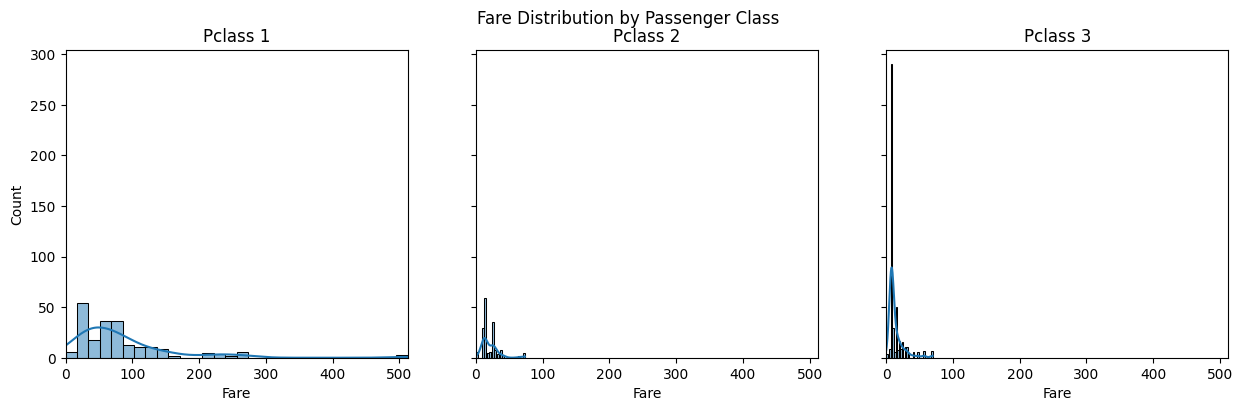

In [296]:
# Display fare distribution per class 
xmin = train_data["Fare"].min()
xmax = train_data["Fare"].max()

fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharey=True)

for pclass, ax in zip([1, 2, 3], axes):
    sns.histplot(
        data=train_data[train_data["Pclass"] == pclass],
        x="Fare",
        bins=30,
        kde=True,
        ax=ax
    )
    ax.set_title(f"Pclass {pclass}")
    ax.set_xlim(xmin, xmax)

axes[0].set_ylabel("Count")
plt.suptitle("Fare Distribution by Passenger Class")
plt.show()

0.2937853107344633


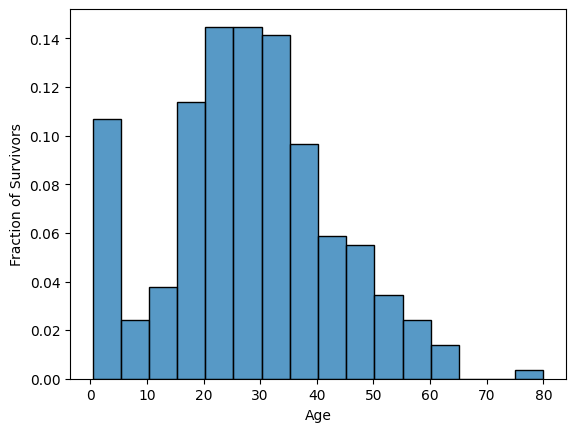

In [297]:
# Display survivors' age distribution 
sns.histplot(data=train_data[train_data["Survived"] == 1], x="Age", binwidth = 5, stat="probability")

survivors_missing_age = train_data[train_data["Age"].isna()]["Survived"].mean()
print(survivors_missing_age) # out of everyone with missing age, roughly 30% survived

plt.ylabel("Fraction of Survivors")
plt.show()

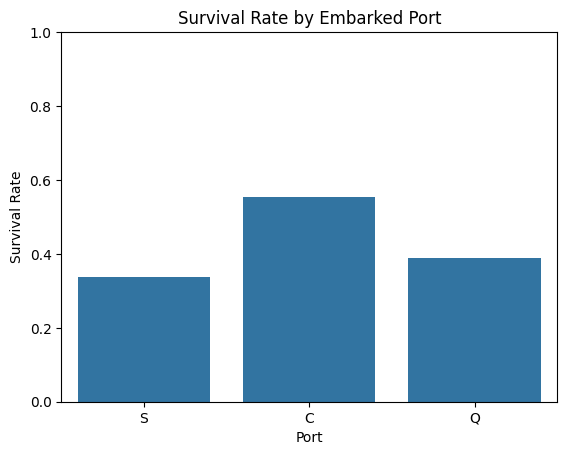

In [298]:
sns.barplot(
    data=train_data,
    x="Embarked",
    y="Survived",
    errorbar=None
)

plt.ylabel("Survival Rate")
plt.xlabel("Port")
plt.title("Survival Rate by Embarked Port")
plt.ylim(0, 1)
plt.show()

In [299]:
def clean_data(data: pd.DataFrame) -> pd.DataFrame:
    # Remove columns with irrelevant or highest percentage of missing data
    data = data.drop(columns=['PassengerId', 'Cabin', 'Ticket', 'Name'])

    # Imputation of missing data
    data["Age"] = data.groupby(["Pclass", "Sex"])["Age"].transform(lambda x: x.fillna(x.median()))
    data["Embarked"] = data["Embarked"].fillna(data["Embarked"].mode()[0])

    global_fare = data["Fare"].mean()
    data["Fare"] = data.groupby(["Pclass", "Embarked"])["Fare"].transform(lambda x: x.fillna(x.mean())).fillna(global_fare)

    # One hot encode categorical variables
    X_encoded = pd.get_dummies(data, columns=['Pclass', 'Sex', 'Embarked'], drop_first=True)

    return X_encoded

In [300]:
cleaned_data = clean_data(train_data)
X = cleaned_data.drop('Survived', axis=1)
y = cleaned_data['Survived']
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         891 non-null    float64
 1   SibSp       891 non-null    int64  
 2   Parch       891 non-null    int64  
 3   Fare        891 non-null    float64
 4   Pclass_2    891 non-null    bool   
 5   Pclass_3    891 non-null    bool   
 6   Sex_male    891 non-null    bool   
 7   Embarked_Q  891 non-null    bool   
 8   Embarked_S  891 non-null    bool   
dtypes: bool(5), float64(2), int64(2)
memory usage: 32.3 KB


In [301]:
# Fit logistic regression as a baseline model
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=42, max_iter=100, class_weight="balanced").fit(X, y)

clf.predict(X)
clf.score(X, y)

c:\Users\vitor\Documents\PythonTraining\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7968574635241302

In [302]:
test_data = pd.read_csv("C:\\Users\\vitor\\Documents\\PythonTraining\\Kaggle\\titanic\\test.csv")
cleaned_test_data = clean_data(test_data)

predictions = clf.predict(cleaned_test_data) # training accuracy of 79%

In [303]:
s = {'PassengerId' : test_data['PassengerId'], 'Survived' : predictions}
submission_pred_logr = pd.DataFrame(data = s)

submission_pred_logr = submission_pred_logr.to_csv("titantic_logisitic.csv", index=False) # testing accuracy of 74%

In [309]:
# Try XGBoost
import xgboost as xgb 
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

xgb_clf = XGBClassifier(
    objective='binary:logistic',
    eval_metric='auc',
    random_state=42
)

param_grid = {
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'colsample_bytree': [0.4, 0.6, 0.8],
    'alpha': [0, 1, 5, 10],
    'lambda': [0, 1, 5, 10],
    'scale_pos_weight': [1, 1.6],
    'n_estimators': [50, 100, 200]
}

grid = GridSearchCV(
    estimator=xgb_clf,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid.fit(X,y)

print("Best AUC result: ", grid.best_score_)
print("Best params: ", grid.best_params_)

Fitting 5 folds for each of 4608 candidates, totalling 23040 fits
Best AUC result:  0.8772925665534009
Best params:  {'alpha': 0, 'colsample_bytree': 0.4, 'lambda': 5, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 100, 'scale_pos_weight': 1}


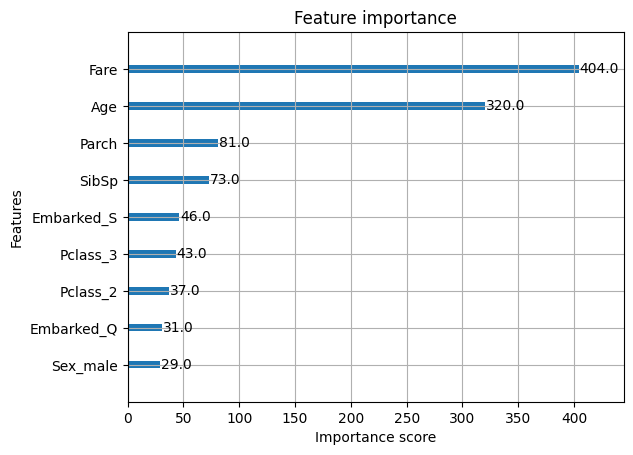

<Figure size 1600x1200 with 0 Axes>

In [306]:
xgb_clf = XGBClassifier(**grid.best_params_)

xgb_clf.fit(X,y)


xgb.plot_importance(xgb_clf)
plt.figure(figsize = (16, 12))
plt.show()

In [307]:
from sklearn.metrics import accuracy_score

y_pred = xgb_clf.predict(X)
print('XGBoost model train accuracy score: {0:0.4f}'. format(accuracy_score(y, y_pred))) # 84% training accuracy

XGBoost model train accuracy score: 0.8900


In [308]:
predictions_xgb = xgb_clf.predict(cleaned_test_data)

s = {'PassengerId' : test_data['PassengerId'], 'Survived' : predictions_xgb}
submission_pred_xgb = pd.DataFrame(data = s)

submission_pred_xgb = submission_pred_xgb.to_csv("titantic_xgb.csv", index=False) # yields 77% testing accuracy